# 📈 Modelo de Regresión

Este notebook implementa un modelo de regresión para predecir los costos médicos (`charges`) usando el dataset `insurance.csv`.

## Pasos sugeridos:
- Cargar los datos
- Preprocesamiento (LabelEncoder, OneHot, escalado)
- Entrenamiento de modelo (LinearRegression, DecisionTreeRegressor, etc.)
- Validación cruzada (Holdout, K-Fold)
- Evaluación con MAE, RMSE, R²
- Visualización de resultados


Saving insurance.csv to insurance (1).csv
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   sex       100 non-null    object 
 2   bmi       100 non-null    float64
 3   children  100 non-null    int64  
 4   smoker    100 non-null    object 
 5   region    100 non-null    object 
 6   charges   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB
None

Estadísticas descriptivas:
             age        bmi    children       charges
count  100.00000  100.00000  100.000000    100.000000
mean    40.88000   30.46910    1.970000  20842.918000
std     13.99082    6.24991    1.466494   5766.278897
min     18.00000   18.36000    0.000000  10236.130000
25%     30.50000   25.85250    1.000000  16550.150000
50%     41.00000   30.26500    2.000000  20077.300000
75%   

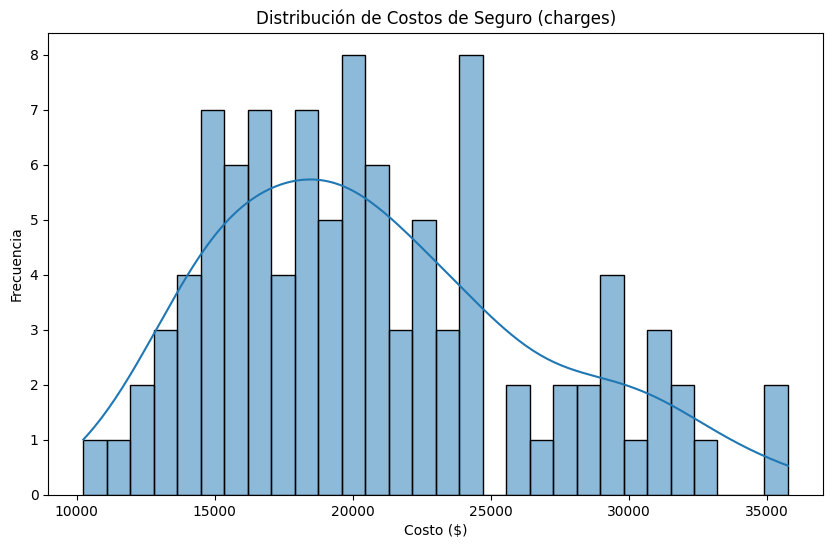

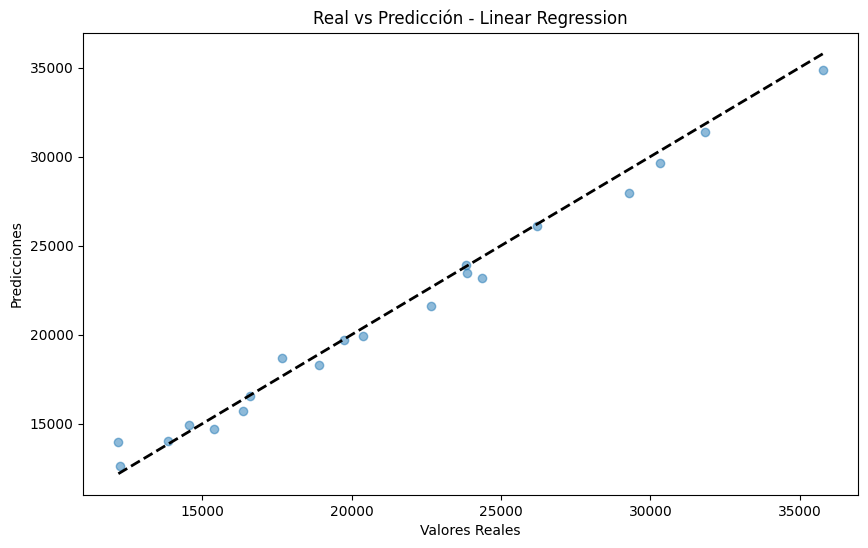

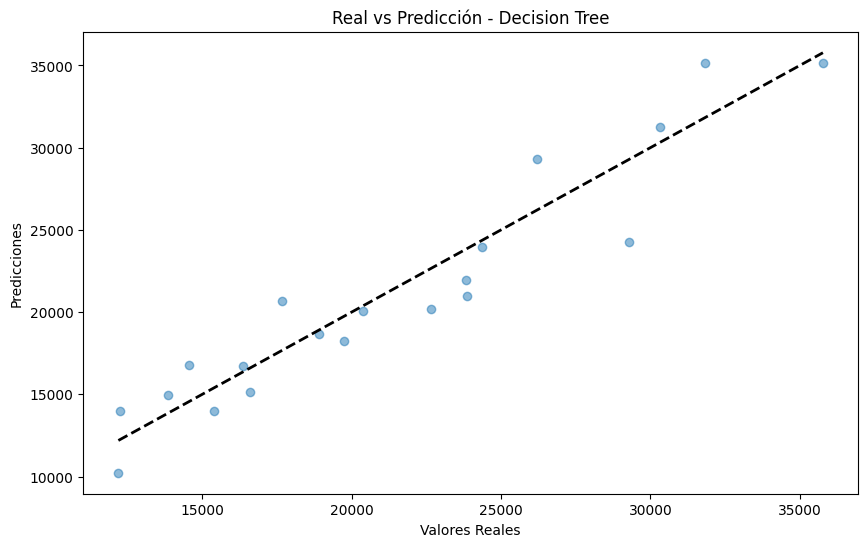


Comparación de Modelos:
                           MAE         RMSE        R²  \
Linear Regression   618.577696   775.777855  0.986358   
Decision Tree        1792.3765   2161.61616  0.894085   
Random Forest      1457.638565  1865.192517  0.921141   

                                                               Model  
Linear Regression  (ColumnTransformer(transformers=[('num',\n    ...  
Decision Tree      (ColumnTransformer(transformers=[('num',\n    ...  
Random Forest      (ColumnTransformer(transformers=[('num',\n    ...  

Validación Cruzada (5-Fold) para Linear Regression:
R² promedio: 0.9632 (± 0.0141)


In [2]:
# Modelo de Regresión para Costos de Seguros Médicos



# %%
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# %%
# Carga de datos
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('insurance.csv')


# %%
# Análisis exploratorio
print("Información del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())
print("\nValores nulos por columna:")
print(df.isnull().sum())


# Visualización de la distribución de 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribución de Costos de Seguro (charges)')
plt.xlabel('Costo ($)')
plt.ylabel('Frecuencia')
plt.show()


# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


# %%
# Preprocesamiento
# Definición de variables
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']


# Transformadores
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# %%
# División de datos
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# %%
# Modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    # Crear pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)])

    # Entrenamiento
    pipeline.fit(X_train, y_train)

    # Predicción
    y_pred = pipeline.predict(X_test)

    # Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Model': pipeline
    }

    # Visualización de resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Real vs Predicción - {name}')
    plt.show()


# %%
# Comparación de modelos
results_df = pd.DataFrame(results).T
print("\nComparación de Modelos:")
print(results_df)


# %%
# Validación cruzada con el mejor modelo
best_model_name = results_df['R²'].idxmax()
best_model = results[best_model_name]['Model']


cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')


print(f"\nValidación Cruzada (5-Fold) para {best_model_name}:")
print(f"R² promedio: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")


# %%
# Función de predicción interactiva (Opcional para nota máxima)
def predict_insurance():
    print("Ingrese los datos para predecir el costo del seguro:")
    age = float(input("Edad: "))
    sex = input("Sexo (male/female): ")
    bmi = float(input("BMI: "))
    children = int(input("Número de hijos: "))
    smoker = input("Fumador? (yes/no): ")
    region = input("Región (northeast/northwest/southeast/southwest): ")

    data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                       columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

    pred = best_model.predict(data)
    print(f"\nPredicción del costo del seguro: ${pred[0]:.2f}")

# Descomentar para usar
# predict_insurance()
